Original Data:
   raceId  year  round grandPrixId  circuitId circuitType  \
0     664  2001      1   australia  melbourne      STREET   
1     664  2001      1   australia  melbourne      STREET   
2     664  2001      1   australia  melbourne      STREET   
3     664  2001      1   australia  melbourne      STREET   
4     664  2001      1   australia  melbourne      STREET   

   positionDisplayOrder positionText               driverId  \
0                     1            1     michael-schumacher   
1                     2            2        david-coulthard   
2                     3            3     rubens-barrichello   
3                     4            4          nick-heidfeld   
4                     5            5  heinz-harald-frentzen   

                    name  ... positionsGained  changeInPosition  pitStops  \
0     Michael Schumacher  ...             0.0                 0         1   
1        David Coulthard  ...             4.0                 4         1   
2     Ru

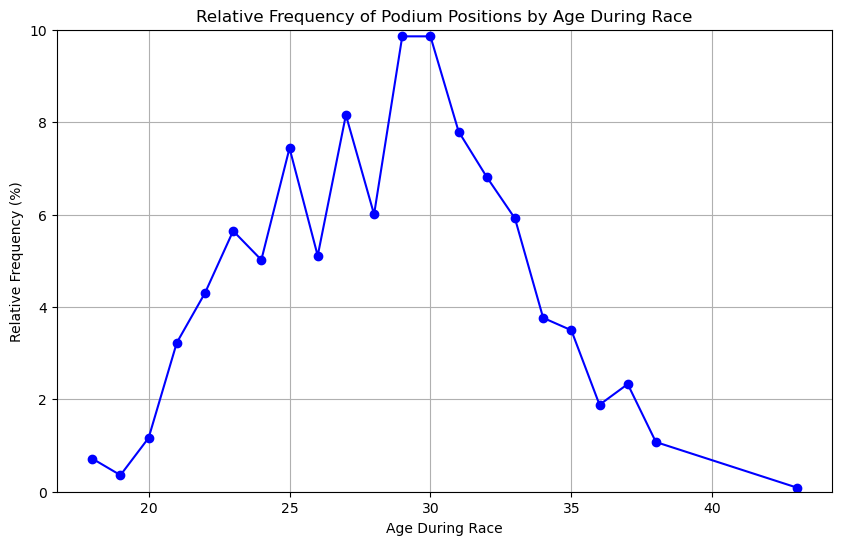

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file (or Excel)
file_path = ("C:/Users/babar/Downloads/Race_Detail_V1.0.csv") # Replace with your CSV file path
df = pd.read_csv(file_path)

# Display first few rows of original data
print("Original Data:")
print(df.head())

# Filter rows where 'podiumPosition' is True
filtered_df = df[df['podiumPosition'] == True]

# Extract only the column 'age_during_race' and 'podiumPosition'
filtered_df = filtered_df[['age_during_race', 'podiumPosition']]

# Display first few rows of filtered data
print("\nFiltered Data (only True podium positions):")
print(filtered_df.head())

# Group by 'age_during_race' and count podium positions
grouped = filtered_df.groupby('age_during_race')['podiumPosition'].count().reset_index()
grouped.columns = ['age_during_race', 'podium_count']

# Calculate relative frequency as percentage
total_podiums = grouped['podium_count'].sum()
grouped['relative_frequency'] = (grouped['podium_count'] / total_podiums) * 100

# Display grouped data
print("\nGrouped Data with Relative Frequency (%):")
print(grouped)

# Plot line graph with relative frequency
plt.figure(figsize=(10,6))
plt.plot(grouped['age_during_race'], grouped['relative_frequency'], marker='o', linestyle='-', color='b')
plt.title("Relative Frequency of Podium Positions by Age During Race")
plt.xlabel("Age During Race")
plt.ylabel("Relative Frequency (%)")
plt.ylim(0, 10)  # Ensure y-axis goes from 0 to 10%
plt.grid(True)
plt.show()

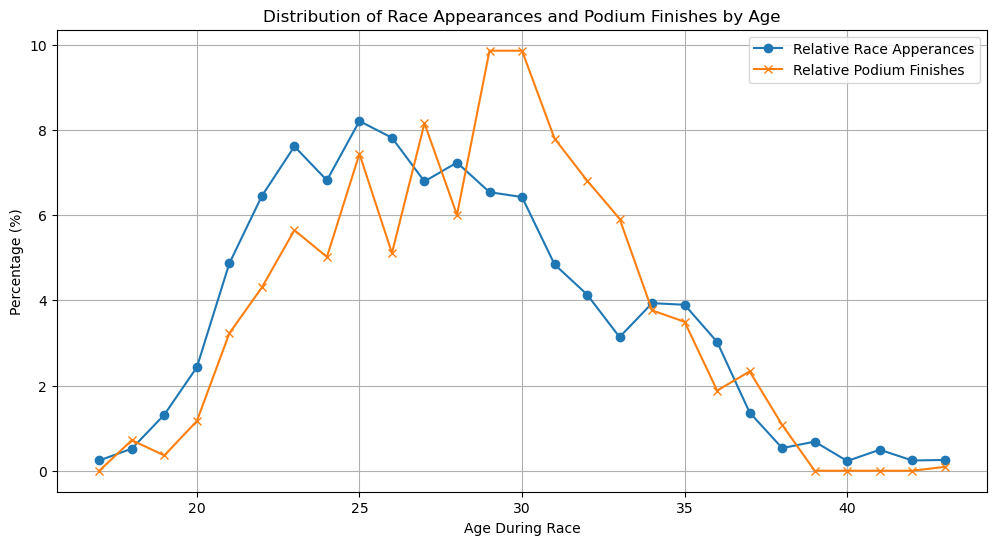

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv("C:/Users/babar/Downloads/Race_Detail_V1.0.csv")

# Drop rows where 'age_during_race', 'podiumPosition', or 'raceId' is blank
df_clean = df.dropna(subset=['age_during_race', 'podiumPosition', 'raceId'])

# Ensure podiumPosition is boolean
df_clean['podiumPosition'] = df_clean['podiumPosition'].astype(bool)

# Count of raceId per age_during_race
race_count = df_clean.groupby('age_during_race')['raceId'].count()

# Count of podiumPosition == True per age_during_race
podium_count = df_clean[df_clean['podiumPosition'] == True].groupby('age_during_race')['podiumPosition'].count()

# Grand totals
grand_total_races = race_count.sum()
grand_total_podiums = podium_count.sum()

# Combine into a single DataFrame
grouped_counts = pd.DataFrame({
    'age_during_race': race_count.index,
    'Race Count': race_count.values,
    'Podium True Count': podium_count.reindex(race_count.index, fill_value=0).values
})

# Convert counts to percentages
grouped_counts['Race Count (% of Grand Total Races)'] = (grouped_counts['Race Count'] / grand_total_races) * 100
grouped_counts['Podium True Count (% of Grand Total Podiums)'] = (grouped_counts['Podium True Count'] / grand_total_podiums) * 100


# Plot overlapping line graph of percentages
plt.figure(figsize=(12,6))
plt.plot(grouped_counts['age_during_race'], grouped_counts['Race Count (% of Grand Total Races)'], marker='o', label='Relative Race Apperances') 
plt.plot(grouped_counts['age_during_race'], grouped_counts['Podium True Count (% of Grand Total Podiums)'], marker='x', label='Relative Podium Finishes')
plt.xlabel('Age During Race')
plt.ylabel('Percentage (%)')
plt.title('Distribution of Race Appearances and Podium Finishes by Age')
plt.legend()
plt.grid(True)
plt.show() 




In [4]:
import pandas as pd

# Load your CSV file
file_path = ("C:/Users/babar/Downloads/With_0_precipitaion.csv")
df = pd.read_csv(file_path)

# Select 300 random rows
random_300 = df.sample(n=300, random_state=42)

# Save to a new CSV file
output_path = "C:/Users/babar/Downloads/sampled_300_rows.csv"
random_300.to_csv(output_path, index=False)

print(f"Saved 300 random rows to: {output_path}")



Saved 300 random rows to: C:/Users/babar/Downloads/sampled_300_rows.csv


In [7]:
import pandas as pd

# Load your CSV file
file_path = ("C:/Users/babar/Downloads/Anything_but_0.csv")
df = pd.read_csv(file_path)

# Select 300 random rows
random_300 = df.sample(n=300, random_state=42)

# Save to a new CSV file
output_path = "C:/Users/babar/Downloads/Anything_but_0_sampled_300_rows.csv"
random_300.to_csv(output_path, index=False)

print(f"Saved 300 random rows to: {output_path}")


Saved 300 random rows to: C:/Users/babar/Downloads/Anything_but_0_sampled_300_rows.csv


<Figure size 5000x3000 with 0 Axes>

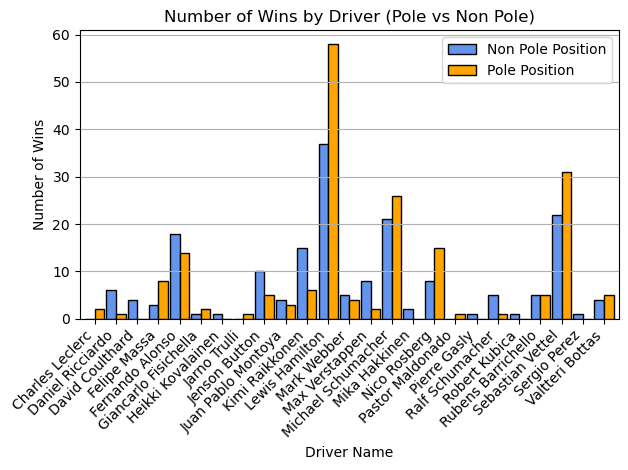

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file
file_path = ("C:/Users/babar/Downloads/Race_Detail_V1.0.csv")
df = pd.read_csv(file_path)

# Ensure correct data types
df['positionDisplayOrder'] = pd.to_numeric(df['positionDisplayOrder'], errors='coerce')
df['polePosition'] = df['polePosition'].astype(str).str.upper() == "TRUE"

# Filter rows
f_filtered_df = df[(df['positionDisplayOrder'] == 1) & (df['polePosition'] == False)]
t_filtered_df = df[(df['positionDisplayOrder'] == 1) & (df['polePosition'] == True)]

# Count by driverId
f_counts = f_filtered_df['name'].value_counts()
t_counts = t_filtered_df['name'].value_counts()

# Combine into one DataFrame
combined_df = pd.DataFrame({
    'Non Pole Position': f_counts,
    'Pole Position': t_counts
}).fillna(0).astype(int)

# Sort by total count
combined_df = combined_df.sort_values(by='name', ascending=True)

# Plot grouped bar chart with wider bars
plt.figure(figsize=(50,30))
combined_df.plot(kind='bar', width=0.9, color=['cornflowerblue', 'orange'], edgecolor='black')
plt.title("Number of Wins by Driver (Pole vs Non Pole)")
plt.xlabel("Driver Name")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y')
plt.show()